In [1]:
# Importing packages 

import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.losses import MeanSquaredError
from tensorboard.plugins.hparams import api as hp
#from kerastuner.tuner import RandomSearch
#from kerastuner.engine.hyperparameters import HyperParameters

2022-05-30 08:50:56.874664: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-30 08:50:56.874697: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Importing data
train_norm = pd.read_csv(r'train_norm_negative_health')
print (train_norm)
test_norm = pd.read_csv(r'test_norm_negative_health')
print (test_norm)

     psi_threshold  psi_slope  Negative_Health
0         0.592600   0.248427         0.247580
1         0.382707   0.320397         0.441423
2         0.573655   0.946282         0.110176
3         0.479204   0.626223         0.230602
4         0.500300   0.603582         0.372423
..             ...        ...              ...
396       0.612133   0.080888         0.294766
397       0.439251   0.559627         0.453051
398       0.569578   0.924403         0.464494
399       0.484850   0.209786         0.506281
400       0.414202   0.862793         0.279448

[401 rows x 3 columns]
     psi_threshold  psi_slope  Negative_Health
0         0.204811   0.358460         0.268677
1         0.261559   0.428206         0.370547
2         0.421600   0.566647         0.181282
3         0.330638   0.406307         0.514191
4         0.371840   0.799345         0.194598
..             ...        ...              ...
96        0.268791   0.713626         0.283349
97        0.353003   0.583496       

In [3]:
# Further splitting train and test data
TARGET_NAME = 'Negative_Health'

# x_train = features, y_train = target for nomalized data
x_train_norm, y_train_norm = train_norm.drop(TARGET_NAME, axis=1), train_norm[TARGET_NAME]
x_test_norm, y_test_norm = test_norm.drop(TARGET_NAME, axis=1), test_norm[TARGET_NAME]


In [4]:
# Building the model
hidden_units1 = 16
hidden_units2 = 9
hidden_units3 = 4
learning_rate = 0.001

# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])

  return model

# build the model
model = build_model_using_sequential()

2022-05-30 08:51:18.568814: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-30 08:51:18.568906: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (j-74105-job-0): /proc/driver/nvidia/version does not exist
2022-05-30 08:51:18.569521: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)

# train the model
history = model.fit(
    x_train_norm.values, 
    y_train_norm.values,
    validation_split=0.2,
    epochs=30, 
    batch_size=10
)


Epoch 1/30
32/32 [==============================] - 1s 7ms/step - loss: 0.0668 - mean_squared_logarithmic_error: 0.0668 - val_loss: 0.0622 - val_mean_squared_logarithmic_error: 0.0604
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 0.0491 - mean_squared_logarithmic_error: 0.0491 - val_loss: 0.0413 - val_mean_squared_logarithmic_error: 0.0395
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 0.0270 - mean_squared_logarithmic_error: 0.0270 - val_loss: 0.0181 - val_mean_squared_logarithmic_error: 0.0164
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 0.0167 - mean_squared_logarithmic_error: 0.0167 - val_loss: 0.0143 - val_mean_squared_logarithmic_error: 0.0129
Epoch 5/30
32/32 [==============================] - 0s 3ms/step - loss: 0.0167 - mean_squared_logarithmic_error: 0.0167 - val_loss: 0.0145 - val_mean_squared_logarithmic_error: 0.0131
Epoch 6/30
32/32 [==============================] - 0s 2ms/step - loss: 0.0156 -

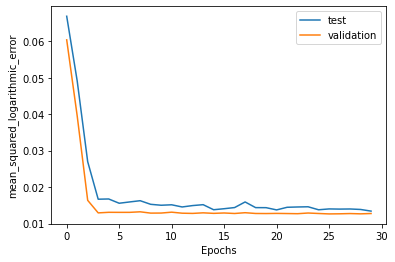

In [13]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend(['test', 'validation'])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [9]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test_norm, y_test_norm, batch_size=128)
print("test loss", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test_norm[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
1/1 [==============================] - 0s 108ms/step - loss: 0.0135 - mean_squared_logarithmic_error: 0.0135
test loss [0.013507592491805553, 0.013507592491805553]
Generate predictions for 3 samples
1/1 [==============================] - 0s 21ms/step
predictions shape: (3, 1)


In [10]:
x_test_norm['prediction'] = model.predict(x_test_norm)
print(x_test_norm)

4/4 [==============================] - 0s 2ms/step
     psi_threshold  psi_slope  prediction
0         0.204811   0.358460    0.268565
1         0.261559   0.428206    0.270918
2         0.421600   0.566647    0.276402
3         0.330638   0.406307    0.271669
4         0.371840   0.799345    0.280152
..             ...        ...         ...
96        0.268791   0.713626    0.276688
97        0.353003   0.583496    0.275558
98        0.396953   0.611345    0.276863
99        0.447408   0.264263    0.270862
100       0.439603   0.306562    0.271565

[101 rows x 3 columns]


In [11]:
print(y_test_norm)
print(x_test_norm['prediction'].min())
print(x_test_norm['prediction'].max())

0      0.268677
1      0.370547
2      0.181282
3      0.514191
4      0.194598
         ...   
96     0.283349
97     0.535790
98     0.344169
99     0.397182
100    0.481633
Name: Negative_Health, Length: 101, dtype: float64
0.2652191
0.28539285
